about this liveProject
In this liveProject, you can gain an overall impression of the job of a Natural Language Processing (NLP) Specialist working on the Growth Hacking Team of a freshly launched startup that is introducing a new video game to the market. One of the key targets of a growth hacking team is to enhance the massive growth of early startups in a short time. To do so, it introduces strategies with the help of which one can acquire as many customers as possible with the lowest cost as possible. As part of your team’s growth hacking strategy, your boss wants to map the field of the video game market. She aims to find out how customers evaluate your competitors’ products, namely what they like and dislike in a video game. Knowing what makes a video game attractive to a gamer helps the marketing team articulate the message of your product more effectively.

To be able to find out what makes a video game worth buying according to gamers, you need to get deeper insights into the linguistic features of their utterances. As an NLP Specialist, your task will be to analyze customers’ reviews about video games. In order to carry out this task, you will employ different NLP methods. These methods will enable you to acquire a deeper understanding of customer feedback and opinion.

Your task as an NLP Specialist on the Growth Hacking Team is the following:

Download the dataset of Amazon reviews.
Create your own dataset from the Amazon reviews.
Decide whether people like or dislike the video game they bought. Label each review with a sentiment score between -1 and 1.
Check the performance of your sentiment analyzer by comparing the sentiment scores with the review ratings.
Evaluate the performance of your sentiment analyzer and find out if you managed to correctly label the reviews.
Try out other methods of sentiment analysis. Explore how people evaluate the video game they purchased by classifying the reviews as positive, negative, and neutral.
Summarize your results to the Head of the Growth Hacking Team. Based on your findings, list those things that are liked and those ones that are disliked about video games.

# Section 1: Data Import, Inspection, and Sampling

## Library Imports

In [4]:
import ndjson
import pandas as pd
import altair

from collections import Counter
from sklearn.datasets import make_classification

from imblearn.under_sampling import RandomUnderSampler




from pathlib import Path



## File reading

In [5]:

data_folder = Path("C:/Users/bblank/Documents/Python/GIT/ManningLPGrowthHacking/data/Video_Games_5")

file_to_open = data_folder / "Video_Games_5.json"

with open(file_to_open) as f:
    data = ndjson.load(f)

# convert to and from objects
text = ndjson.dumps(data)
data = ndjson.loads(text)



## Item inspection and dataframe generation
 

In [6]:

reviews = pd.DataFrame.from_dict(data)
data[6]


{'overall': 1.0,
 'verified': False,
 'reviewTime': '08 2, 2014',
 'reviewerID': 'A1KXJ1ELZIU05C',
 'asin': '0700026657',
 'reviewerName': 'Creation27',
 'reviewText': "I'm an avid gamer, but Anno 2070 is an INSULT to gaming.  It is so buggy and half-finished that the first campaign doesn't even work properly and the DRM is INCREDIBLY frustrating to deal with.\n\nOnce you manage to work your way past the massive amounts of bugs and get through the DRM, HOURS later you finally figure out that the game has no real tutorial, so you stuck just clicking around randomly.\n\nSad, sad, sad, example of a game that could have been great but FTW.",
 'summary': 'Avoid This Game - Filled with Bugs',
 'unixReviewTime': 1406937600}

In [4]:
reviews.shape

(497577, 12)

In [7]:
reviews[reviews.reviewerID=='A2EYD6E0TFQPVL']

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
81625,1.0,True,"12 16, 2011",A2EYD6E0TFQPVL,B000FKBCX4,chris,The game was really cool up until you start tr...,waste of money,1323993600,NaN,"{'Edition:': ' Standard', 'Platform:': ' PC/Mac'}",NaN
188136,5.0,True,"12 16, 2011",A2EYD6E0TFQPVL,B001VJ4DHK,chris,"Great story, insane environments, awesome alie...",AMAZING,1323993600,NaN,{'Format:': ' Video Game'},NaN
241265,3.0,False,"03 14, 2012",A2EYD6E0TFQPVL,B0050SY06W,chris,I Think it's funny that the price dropped so f...,"simply amazing, for about a week",1331683200,3,{'Format:': ' Video Game'},NaN
433323,3.0,True,"04 14, 2017",A2EYD6E0TFQPVL,B01BY7YIC8,chris,Cool mirco android based gaming system.\nPros;...,"worth it, but just barely",1492128000,2,NaN,NaN
492473,3.0,True,"03 17, 2018",A2EYD6E0TFQPVL,B00NPG4MUU,chris,"works good as a training tool,but if you want ...",Three Stars,1521244800,NaN,"{'Edition:': ' Cable Included', 'Platform:': '...",NaN
495370,1.0,True,"03 17, 2018",A2EYD6E0TFQPVL,B014G03F24,chris,"code didn't work, got me a refund.",One Star,1521244800,NaN,NaN,NaN


## Histogram

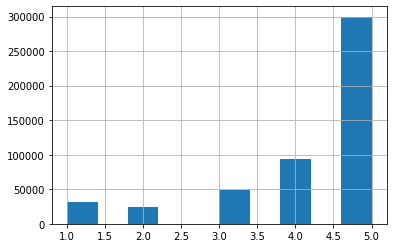

In [8]:
reviews.overall.hist()


## Random undersampling

In [9]:
#split the reviews
y=reviews['overall']
x=reviews.drop(['overall'], axis=1)

rus = RandomUnderSampler( sampling_strategy={1.0: 1500, 2.0: 500, 3.0: 500, 4.0: 500, 5.0: 1500}, random_state=42, )

results = rus.fit_sample(x,y)
samples = results[0]
rating = results[1]
samples['overall']=rating

samples.head()

,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image,overall
0,False,"10 22, 2008",A74TA8X5YQ7NE,B000X9FV5M,NeuroSplicer,Recently UBISOFT had to settle a huge class-ac...,THE DAY GAMING CRIED...,1224633600,NaN,{'Format:': ' Video Game'},NaN,1.0
1,True,"03 17, 2018",A2EYD6E0TFQPVL,B014G03F24,chris,"code didn't work, got me a refund.",One Star,1521244800,NaN,NaN,NaN,1.0
2,True,"02 22, 2017",A303LKXI2SAZQ4,B003OAE79S,tammy,"these do not work at all, all i get is static ...","these do not work at all, all i get ...",1487721600,NaN,{'Size:': ' one size'},NaN,1.0
3,False,"03 23, 2012",A1JGSUX59ZTWYE,B004UDLRMS,Bear,well let me start by saying that when i first ...,last gen game,1332460800,6,{'Format:': ' Video Game'},NaN,1.0
4,False,"05 16, 2008",AXIVHIP86D1MJ,B0013B30SY,Mustang,"Dont waste your money, you will just end up us...",Waste,1210896000,4,NaN,NaN,1.0


## Subsample

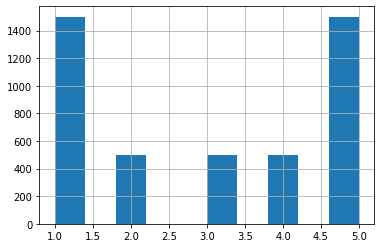

In [11]:
samples.overall.hist()

## Saving flat files

In [19]:
small = samples[['overall', 'reviewText']]

large = reviews[['overall', 'reviewText']]


#small.to_csv('small_corpus.csv',sep=',', index=False)
#large.to_csv('large_corpus.csv', sep=',', index=False)

# Section2: NLP